In [46]:
import cartopy.crs as crs
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature
import cartopy.util as cutil
from glob import glob
import pandas as pd
import re
import pyproj
import wrf
%matplotlib inline


## PLAY WITH THE ZORDER TO SHOW DATA CONTOUR OR REAL MASKING...

In [47]:
def rgb2cmap(filename,base='255'):
  """Function to read a rgb file (NCL colortables) and convert them to matplotlib colormap
     Author: Daniel Argueso @ CCRC, UNSW. Sydney (Australia)
  """

  filein=open(filename)
  lines=filein.readlines()
  colors=[]

  for line in lines[2:]:
      line=re.sub('\s+',' ',line)
      li=line.strip()
      if li:
          values=li.split(' ')
          if base == '255':
            new_values=[i/255. for i in map(int,values[:3])]
          else:
            new_values=[i for i in map(float,values[:3])]
          colors.append(new_values)
  cmap=ListedColormap(colors)
  cmap.set_over(colors[-1])
  cmap.set_under(colors[0])

  return cmap

In [48]:

clon = 0
clat = 38



In [49]:
#HI-RES GCM
nchgt = xr.open_dataset("./orog_fx_CESM2_hist-GHG_r2i1p1f1_gn.nc")
nclm = xr.open_dataset("./sftlf_fx_CESM2_hist-GHG_r2i1p1f1_gn.nc")
nchgt_lm=nchgt.where(nclm.sftlf>20.)

lon_pcolormesh=nchgt.lon.values-np.mean(np.diff(nchgt.lon.values)*0.5)
lat_pcolormesh=nchgt.lat.values-np.mean(np.diff(nchgt.lat.values)*0.5)

cyclic_data, cyclic_lons = cutil.add_cyclic_point(nchgt_lm.orog.values, coord=lon_pcolormesh)
lon2d, lat2d = np.meshgrid(cyclic_lons, lat_pcolormesh)





/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'orog' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [50]:
np.mean(np.diff(nchgt.lon.values)*0.5)

0.625

In [51]:
#LO-RES GCM
nchgt_low = xr.open_dataset("./orog_fx_CanESM5_esm-hist_r10i1p1f1_gn.nc")
nclm_low = xr.open_dataset("./sftlf_fx_CanESM5_esm-hist_r1i1p1f1_gn.nc")
nchgt_low_lm=nchgt_low.where(nclm_low.sftlf>20.)

lon_pcolormesh_low=nchgt_low.lon.values-np.mean(np.diff(nchgt_low.lon.values)*0.5)
lat_pcolormesh_low=nchgt_low.lat.values-np.mean(np.diff(nchgt_low.lat.values)*0.5)

cyclic_data_low, cyclic_lons_low = cutil.add_cyclic_point(nchgt_low_lm.orog.values, coord=lon_pcolormesh_low)
lon2d_low, lat2d_low = np.meshgrid(cyclic_lons_low, lat_pcolormesh_low)


In [52]:
# geo_file2=xr.open_dataset('/home/dargueso/share/geo_em_files/examples/geo_em.Montreal.d01.nc')
# geo_file_lm2 = geo_file2.HGT_M.where(geo_file2.LANDMASK>0.)
# lat2 = geo_file2.XLAT_M.squeeze().values
# lon2 = geo_file2.XLONG_M.squeeze().values
# latint_border2 = np.concatenate((lat2[0,:],lat2[:,-1],lat2[-1,::-1],lat2[::-1,0]))
# lonint_border2 = np.concatenate((lon2[0,:],lon2[:,-1],lon2[-1,::-1],lon2[::-1,0]))

In [53]:
geo_file=xr.open_dataset('./geo_em.d01.EPICC_2km_ERA5_HVC_GWD.nc')
geo_file_lm = geo_file.HGT_M.where(geo_file.LANDMASK>0.)
lat = geo_file.XLAT_M.squeeze().values
lon = geo_file.XLONG_M.squeeze().values
latint_border = np.concatenate((lat[0,:],lat[:,-1],lat[-1,::-1],lat[::-1,0]))
lonint_border = np.concatenate((lon[0,:],lon[:,-1],lon[-1,::-1],lon[::-1,0]))








/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


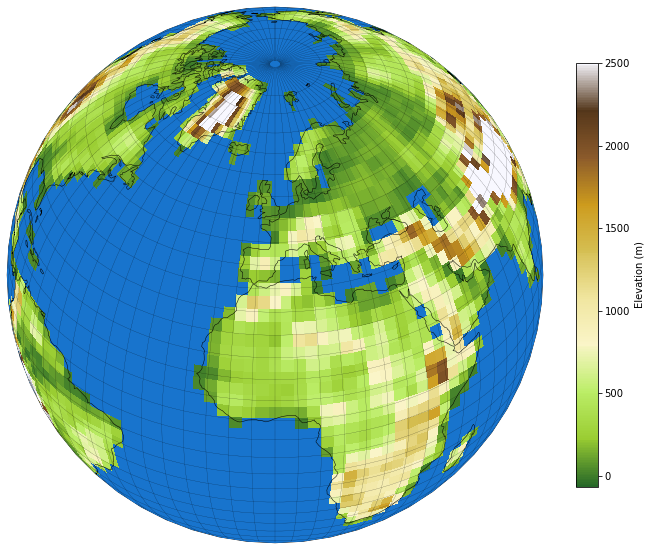

In [54]:
cart_proj=crs.Orthographic(central_longitude=clon, central_latitude=clat, globe=None)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=cart_proj)
ax.coastlines(linewidth=0.5,zorder=101)
ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAND, zorder=100, edgecolor=None,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAKES, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])

cmap=rgb2cmap("./LandSnow.rgb")
current_cmap = matplotlib.cm.get_cmap(cmap)
current_cmap.set_bad(color=[24/255,  116/255,  205/255])


contourf = ax.pcolormesh(lon2d_low, lat2d_low, cyclic_data_low, cmap=current_cmap,
                       transform=crs.PlateCarree(),vmax=2500,zorder=101)
gl = ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-180,181,5), ylocs=range(-80,81,5),
                  draw_labels=False, zorder=102,
                  linewidth=0.2, color='k', alpha=1, linestyle='--')


cbar = plt.colorbar(contourf,shrink=0.65)
cbar.set_label ('Elevation (m)')
plt.show()

/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


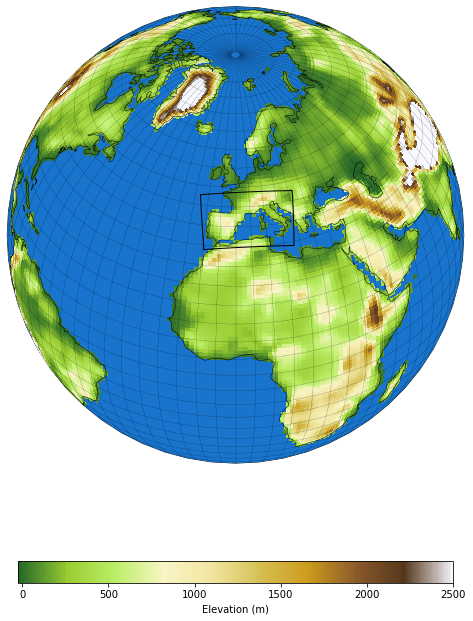

In [65]:
cart_proj=crs.Orthographic(central_longitude=clon, central_latitude=clat, globe=None)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=cart_proj)
ax.coastlines(linewidth=0.5,zorder=102)
ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAND, zorder=100, edgecolor=None,facecolor=[24/255,  116/255,  205/255])
#ax.add_feature(cfeature.LAKES, zorder=101,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])


ax.plot(lonint_border,latint_border,linewidth=1,color='k',transform=crs.PlateCarree(),zorder=102)


cmap=rgb2cmap("./LandSnow.rgb")
contourf = ax.pcolormesh(lon2d, lat2d, cyclic_data, cmap=cmap,
                       transform=crs.PlateCarree(),vmax=2500,zorder=101)
gl = ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-180,181,5), ylocs=range(-80,81,5),
                  draw_labels=False, zorder=102,
                  linewidth=0.2, color='k', alpha=1, linestyle='--')


cbar = plt.colorbar(contourf,orientation='horizontal',shrink=0.65)
cbar.set_label ('Elevation (m)')
# plt.show()
plt.savefig('GCM_topo.png',dpi=300)

/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


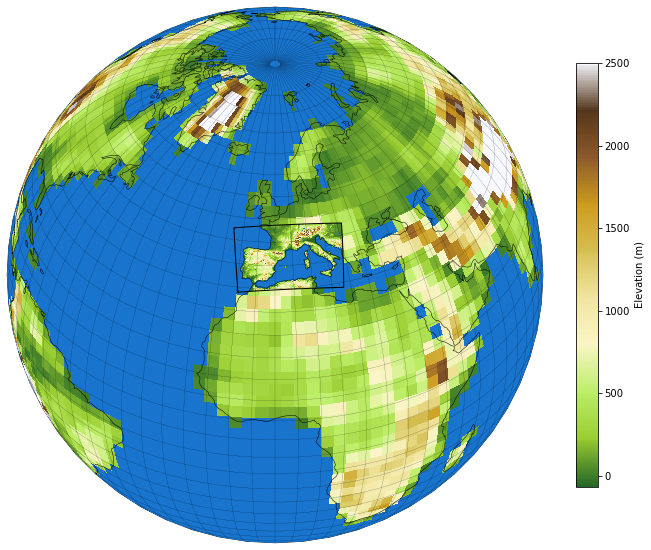

In [56]:
cart_proj=crs.Orthographic(central_longitude=clon, central_latitude=clat, globe=None)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=cart_proj)

ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAND, zorder=100, edgecolor=None,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAKES, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])

cmap=rgb2cmap("./LandSnow.rgb")
current_cmap = matplotlib.cm.get_cmap(cmap)
current_cmap.set_bad(color=[24/255,  116/255,  205/255])


contourf = ax.pcolormesh(lon2d_low, lat2d_low, cyclic_data_low, cmap=current_cmap,
                       transform=crs.PlateCarree(),vmax=2500,zorder=101)

contourf_dom = ax.pcolormesh(lon, lat, geo_file_lm.squeeze().values, cmap=current_cmap,
                        transform=crs.PlateCarree(),vmax=2500,zorder=102)
ax.plot(lonint_border,latint_border,linewidth=1,color='k',transform=crs.PlateCarree(),zorder=102)


ax.coastlines(linewidth=0.5,zorder=103)
gl = ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-180,181,5), ylocs=range(-80,81,5),
                  draw_labels=False, zorder=103,
                  linewidth=0.2, color='k', alpha=1, linestyle='--')




cbar = plt.colorbar(contourf,shrink=0.65)
cbar.set_label ('Elevation (m)')
plt.show()




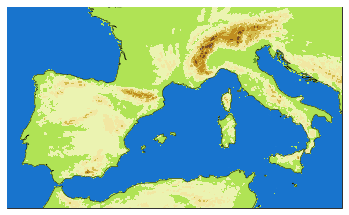

In [57]:
WRFproj=wrf.LambertConformal(stand_lon=geo_file.STAND_LON,moad_cen_lat=geo_file.MOAD_CEN_LAT,truelat1=geo_file.TRUELAT1,truelat2=geo_file.TRUELAT2,pole_lat=geo_file.POLE_LAT,pole_lon=geo_file.POLE_LON)
ax = plt.axes(projection=WRFproj.cartopy())
ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
current_cmap = matplotlib.cm.get_cmap(cmap)
current_cmap.set_bad(color=[24/255,  116/255,  205/255])
ax.contourf(lon,lat,geo_file_lm.squeeze(),cmap=cmap,transform=crs.PlateCarree(),zorder=102)
ax.coastlines(linewidth=0.5,zorder=102,resolution='50m')


In [58]:
x0,x1,y0,y1=ax.get_extent()

/Users/daniel/opt/anaconda3/envs/py385_std/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


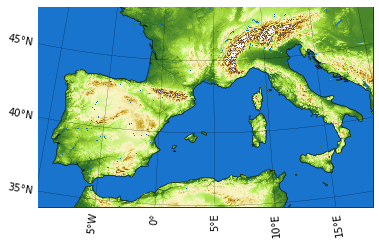

In [69]:
WRFproj=wrf.LambertConformal(stand_lon=geo_file.STAND_LON,moad_cen_lat=geo_file.MOAD_CEN_LAT,truelat1=geo_file.TRUELAT1,truelat2=geo_file.TRUELAT2,pole_lat=geo_file.POLE_LAT,pole_lon=geo_file.POLE_LON)
ax = plt.axes(projection=WRFproj.cartopy())
ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
current_cmap = matplotlib.cm.get_cmap(cmap)
current_cmap.set_bad(color=[24/255,  116/255,  205/255])
ax.coastlines(linewidth=0.5,zorder=102,resolution='50m')
ax.pcolormesh(lon, lat, geo_file_lm.squeeze().values, cmap=current_cmap,
                       transform=crs.PlateCarree(),vmax=2500,zorder=102)


ax.set_xlim(x0,x1)
ax.set_ylim(y0,y1)


gl=ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-25,35,5), ylocs=range(20,60,5),x_inline=False, y_inline=False,
                draw_labels=True, zorder=103,linewidth=0.2, color='k', alpha=1, linestyle='-')
gl.top_labels = False
gl.right_labels = False
plt.savefig('WRF_topo.png',dpi=300)


In [60]:
lakes50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')


WRFproj=wrf.LambertConformal(stand_lon=geo_file2.STAND_LON,moad_cen_lat=geo_file2.MOAD_CEN_LAT,truelat1=geo_file2.TRUELAT1,truelat2=geo_file2.TRUELAT2,pole_lat=geo_file2.POLE_LAT,pole_lon=geo_file2.POLE_LON)
ax = plt.axes(projection=WRFproj.cartopy())
ax.add_feature(cfeature.OCEAN, zorder=101,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(lakes50m, zorder=101,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])


current_cmap = matplotlib.cm.get_cmap(cmap)
current_cmap.set_bad(color=[24/255,  116/255,  205/255])
#ax.contourf(lon2,lat2,geo_file2.HGT_M.squeeze(),cmap=cmap,transform=crs.PlateCarree(),zorder=100)
ax.coastlines(linewidth=0.5,zorder=102,resolution='50m')
ax.pcolormesh(lon2, lat2, geo_file_lm2.squeeze().values, cmap=current_cmap,
                       transform=crs.PlateCarree(),vmax=2500,zorder=100)
#geob=wrf.GeoBounds(wrf.CoordPair(lon=lon[0,0],lat=lat[0,0]),wrf.CoordPair(lon=lon[-1,-1],lat=lat[-1,-1]))
geob=wrf.GeoBounds(lats=lat2,lons=lon2)

#ax.set_extent([WRFproj.cartopy_xlim(geob)[0],WRFproj.cartopy_xlim(geob)[1],WRFproj.cartopy_ylim(geob)[0],WRFproj.cartopy_ylim(geob)[1]])


NameError: name 'geo_file2' is not defined